# Aviation Data Analysis

### Sreenath V
Christ Deemed to be University, Bengaluru

### Objective

The objective of this analysis is to identify patterns and factors contributing to flight delays. The analysis investigates relationships between departure times, airlines, and delays to provide insights into flight punctuality.

## Setup Environment

Ensure you have Python 3.x installed.



#### Install virtualenv (if not installed)
```bash
 pip install virtualenv
  ```

#### Navigate to project folder
```bash
 cd path_to_your_project 
 ```

#### Create virtual environment
```bash
 virtualenv venv
  ```

#### Activate the virtual environment
##### On Windows
```bash
 venv\Scripts\activate
 ```

##### On macOS/Linux
```bash
 source venv/bin/activate
 ```

#### Install Required Libraries

Install the required packages, including **SciPy**, by running the following:

```bash 
    
  python -m  pip install pandas numpy seaborn matplotlib scipy

```

or you can directly install all the packages using the requirement.txt provided

```bash
    python -m pip install -r requirement.txt
```
pandas: For data manipulation and cleaning.
numpy: For numerical computations.
seaborn: For visualization.
matplotlib: For plotting graphs.
scipy: For advanced statistical computations.

# Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Loading the Dataset

In [9]:
# Load the dataset
df = pd.read_csv('aviation_data.csv')

df

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes
0,AA1234,09/01/2023,08:30 AM,09/01/2023,10:45 AM,American Airlines,15.0
1,DL5678,09/01/2023,01:15 PM,09/01/2023,03:30 PM,Delta,5.0
2,UA9101,09/01/2023,05:00 PM,09/01/2023,07:15 PM,United Airlines,25.0
3,AA1234,09/01/2023,08:30 AM,09/01/2023,10:45 PM,American Airlines,30.0
4,DL5678,09/02/2023,02:00 PM,09/02/2023,04:10 PM,Delta,NaN
5,UA9101,09/02/2023,05:00 PM,09/02/2023,07:15 PM,United Airlines,20.0
6,AA1234,09/02/2023,08:30 PM,09/03/2023,10:45 AM,American Airlines,60.0
7,DL5678,09/03/2023,01:00 PM,09/03/2023,03:30 PM,Delta,10.0
8,UA9101,09/03/2023,03:00 PM,09/03/2023,05:20 PM,United Airlines,NaN
9,AA1234,09/03/2023,08:30 AM,09/03/2023,10:00 AM,American Airlines,15.0


# Summary of the dataset

In [10]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FlightNumber   12 non-null     object 
 1   DepartureDate  12 non-null     object 
 2   DepartureTime  12 non-null     object 
 3   ArrivalDate    12 non-null     object 
 4   ArrivalTime    12 non-null     object 
 5   Airline        12 non-null     object 
 6   DelayMinutes   10 non-null     float64
dtypes: float64(1), object(6)
memory usage: 804.0+ bytes


# Identifying the duplicate records

Here, The duplicate values will be identified based on the columns FlightNumber,DepartureDate, DepartureTime. If any duplicates are found, pnly the first value will be kept and others will be removed. 

Also the delay time is replaced by the average from the duplicates as well as the original value

In [12]:
# Step 1: Group by FlightNumber, DepartureDate, and DepartureTime to find duplicates
df_duplicates = df.duplicated(subset=['FlightNumber', 'DepartureDate', 'DepartureTime'], keep=False)

# Step 2: Calculate the average delay for each group
df['AverageDelay'] = df.groupby(['FlightNumber', 'DepartureDate', 'DepartureTime'])['DelayMinutes'].transform('mean')

# Step 3: Drop duplicate entries, keeping only the first one
df = df.drop_duplicates(subset=['FlightNumber', 'DepartureDate', 'DepartureTime'], keep='first')

# Step 4: Replace DelayMinutes with the calculated average delay
df['DelayMinutes'] = df['AverageDelay']

# Step 5: Drop the helper column 'AverageDelay' since it's no longer needed
df = df.drop(columns=['AverageDelay'])

# Display the updated dataframe
df

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes
0,AA1234,09/01/2023,08:30 AM,09/01/2023,10:45 AM,American Airlines,22.5
1,DL5678,09/01/2023,01:15 PM,09/01/2023,03:30 PM,Delta,5.0
2,UA9101,09/01/2023,05:00 PM,09/01/2023,07:15 PM,United Airlines,25.0
4,DL5678,09/02/2023,02:00 PM,09/02/2023,04:10 PM,Delta,NaN
5,UA9101,09/02/2023,05:00 PM,09/02/2023,07:15 PM,United Airlines,20.0
6,AA1234,09/02/2023,08:30 PM,09/03/2023,10:45 AM,American Airlines,60.0
7,DL5678,09/03/2023,01:00 PM,09/03/2023,03:30 PM,Delta,10.0
8,UA9101,09/03/2023,03:00 PM,09/03/2023,05:20 PM,United Airlines,NaN
9,AA1234,09/03/2023,08:30 AM,09/03/2023,10:00 AM,American Airlines,15.0
10,DL5678,09/04/2023,12:30 PM,09/04/2023,02:40 PM,Delta,25.0


# Handling Missing values
In the above Dataset, DelayMinutes column contain null(NaN) values that leads to inconsistency in the dataset also it will leads to inaccurate analysis.
Those missing values can be handled by replacing them with a mean value of the particular airline

In [13]:
# Step 1: Calculate the mean delay for each airline
airline_mean_delay = df.groupby('Airline')['DelayMinutes'].transform('mean')

# Step 2: Fill NaN values in DelayMinutes with the corresponding airline's mean delay
df['DelayMinutes'] = df['DelayMinutes'].fillna(airline_mean_delay)

# Step 3: Convert DelayMinutes to numeric in case it's not already
df['DelayMinutes'] = pd.to_numeric(df['DelayMinutes'])

# Display the updated dataframe
df

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes
0,AA1234,09/01/2023,08:30 AM,09/01/2023,10:45 AM,American Airlines,22.500000
1,DL5678,09/01/2023,01:15 PM,09/01/2023,03:30 PM,Delta,5.000000
2,UA9101,09/01/2023,05:00 PM,09/01/2023,07:15 PM,United Airlines,25.000000
4,DL5678,09/02/2023,02:00 PM,09/02/2023,04:10 PM,Delta,13.333333
5,UA9101,09/02/2023,05:00 PM,09/02/2023,07:15 PM,United Airlines,20.000000
6,AA1234,09/02/2023,08:30 PM,09/03/2023,10:45 AM,American Airlines,60.000000
7,DL5678,09/03/2023,01:00 PM,09/03/2023,03:30 PM,Delta,10.000000
8,UA9101,09/03/2023,03:00 PM,09/03/2023,05:20 PM,United Airlines,30.000000
9,AA1234,09/03/2023,08:30 AM,09/03/2023,10:00 AM,American Airlines,15.000000
10,DL5678,09/04/2023,12:30 PM,09/04/2023,02:40 PM,Delta,25.000000


# Standardizing the Date and Time values

In [14]:
# Convert DepartureDate and ArrivalDate to datetime in YYYY-MM-DD format
df['DepartureDate'] = pd.to_datetime(df['DepartureDate'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')
df['ArrivalDate'] = pd.to_datetime(df['ArrivalDate'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')

# Convert DepartureTime and ArrivalTime to 24-hour time format (HH:MM)
df['DepartureTime'] = pd.to_datetime(df['DepartureTime'], format='%I:%M %p').dt.strftime('%H:%M')
df['ArrivalTime'] = pd.to_datetime(df['ArrivalTime'], format='%I:%M %p').dt.strftime('%H:%M')

df

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes
0,AA1234,2023-09-01,08:30,2023-09-01,10:45,American Airlines,22.500000
1,DL5678,2023-09-01,13:15,2023-09-01,15:30,Delta,5.000000
2,UA9101,2023-09-01,17:00,2023-09-01,19:15,United Airlines,25.000000
4,DL5678,2023-09-02,14:00,2023-09-02,16:10,Delta,13.333333
5,UA9101,2023-09-02,17:00,2023-09-02,19:15,United Airlines,20.000000
6,AA1234,2023-09-02,20:30,2023-09-03,10:45,American Airlines,60.000000
7,DL5678,2023-09-03,13:00,2023-09-03,15:30,Delta,10.000000
8,UA9101,2023-09-03,15:00,2023-09-03,17:20,United Airlines,30.000000
9,AA1234,2023-09-03,08:30,2023-09-03,10:00,American Airlines,15.000000
10,DL5678,2023-09-04,12:30,2023-09-04,14:40,Delta,25.000000


# Fixing Inconsistent Time Entries

In [15]:
# Combine DepartureDate and DepartureTime to create a datetime column
df['DepartureDateTime'] = pd.to_datetime(df['DepartureDate'] + ' ' + df['DepartureTime'])
df['ArrivalDateTime'] = pd.to_datetime(df['ArrivalDate'] + ' ' + df['ArrivalTime'])

# Correct inconsistencies: if ArrivalDateTime is earlier than or equal to DepartureDateTime, add 1 day to ArrivalDateTime
df['ArrivalDateTime'] = np.where(df['ArrivalDateTime'] <= df['DepartureDateTime'], 
                                 df['ArrivalDateTime'] + pd.DateOffset(days=1), 
                                 df['ArrivalDateTime'])

# Update ArrivalDate and ArrivalTime columns with the corrected values
df['ArrivalDate'] = df['ArrivalDateTime'].dt.strftime('%Y-%m-%d')
df['ArrivalTime'] = df['ArrivalDateTime'].dt.strftime('%H:%M')

# Drop the temporary datetime columns
df.drop(columns=['DepartureDateTime', 'ArrivalDateTime'], inplace=True)

df

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes
0,AA1234,2023-09-01,08:30,2023-09-01,10:45,American Airlines,22.500000
1,DL5678,2023-09-01,13:15,2023-09-01,15:30,Delta,5.000000
2,UA9101,2023-09-01,17:00,2023-09-01,19:15,United Airlines,25.000000
4,DL5678,2023-09-02,14:00,2023-09-02,16:10,Delta,13.333333
5,UA9101,2023-09-02,17:00,2023-09-02,19:15,United Airlines,20.000000
6,AA1234,2023-09-02,20:30,2023-09-03,10:45,American Airlines,60.000000
7,DL5678,2023-09-03,13:00,2023-09-03,15:30,Delta,10.000000
8,UA9101,2023-09-03,15:00,2023-09-03,17:20,United Airlines,30.000000
9,AA1234,2023-09-03,08:30,2023-09-03,10:00,American Airlines,15.000000
10,DL5678,2023-09-04,12:30,2023-09-04,14:40,Delta,25.000000


# Interpretations
1. From the given dataset, The ArrivalTime for every entry is later than DepartureTime on the same day. So there is no inconsistencies in the Arrival time.

2. But, The flight AA1234 seems to have both international and domestic fight trips.Since it has trip duation less than 3 hours and more than 12 hours. If the given dataset given is only about domestic flights then it may have time inconsistencies otherwise we cannot assume that it has data inconsistencies


# Fight Durations for each flight trips
Create a new column for FlightDuration by calculating the difference between DepartureTime and
ArrivalTime on the same day.

In [16]:
df['DepartureDateTime'] = pd.to_datetime(df['DepartureDate'] + ' ' + df['DepartureTime'])
df['ArrivalDateTime'] = pd.to_datetime(df['ArrivalDate'] + ' ' + df['ArrivalTime'])

# Calculate Flight Duration in minutes
df['FlightDuration(Minutes)'] = (df['ArrivalDateTime'] - df['DepartureDateTime']).dt.total_seconds()/60 

# Drop the temporary datetime columns if needed
df.drop(columns=['DepartureDateTime', 'ArrivalDateTime'], inplace=True)
df

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes,FlightDuration(Minutes)
0,AA1234,2023-09-01,08:30,2023-09-01,10:45,American Airlines,22.500000,135.0
1,DL5678,2023-09-01,13:15,2023-09-01,15:30,Delta,5.000000,135.0
2,UA9101,2023-09-01,17:00,2023-09-01,19:15,United Airlines,25.000000,135.0
4,DL5678,2023-09-02,14:00,2023-09-02,16:10,Delta,13.333333,130.0
5,UA9101,2023-09-02,17:00,2023-09-02,19:15,United Airlines,20.000000,135.0
6,AA1234,2023-09-02,20:30,2023-09-03,10:45,American Airlines,60.000000,855.0
7,DL5678,2023-09-03,13:00,2023-09-03,15:30,Delta,10.000000,150.0
8,UA9101,2023-09-03,15:00,2023-09-03,17:20,United Airlines,30.000000,140.0
9,AA1234,2023-09-03,08:30,2023-09-03,10:00,American Airlines,15.000000,90.0
10,DL5678,2023-09-04,12:30,2023-09-04,14:40,Delta,25.000000,130.0


Text(0, 0.5, 'Frequency')

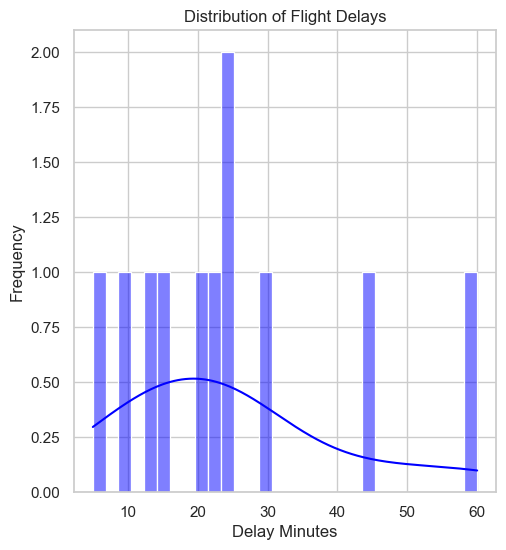

In [17]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting the distribution of delays
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['DelayMinutes'], bins=30, kde=True, color='blue')
plt.title('Distribution of Flight Delays')
plt.xlabel('Delay Minutes')
plt.ylabel('Frequency')


# interpretation

Delta Airlines :



 The median delay for Delta is around 10 minutes. The interquartile range (IQR) shows that most delays fall between 5 and 20 minutes. There are no extreme outliers, and the overall delay times are fairly consistent.

United Airlines:
    
The median delay is about 25 minutes, with most delays ranging from 20 to 30 minutes. This indicates a tendency for more significant delays than Delta, but the variability remains moderate without large outliers.
American Airlines :
    The delays for American Airlines are more spread out, with a median of about 35 minutes. The upper quartile and whisker extend close to 60 minutes, indicating that some flights experience significant delays, and the range of delays is much larger than Delta and United.

Summary :

American Airlines appears to have the largest delay variability and longer delays on average. Delta has the most consistent performance, with relatively short delays.

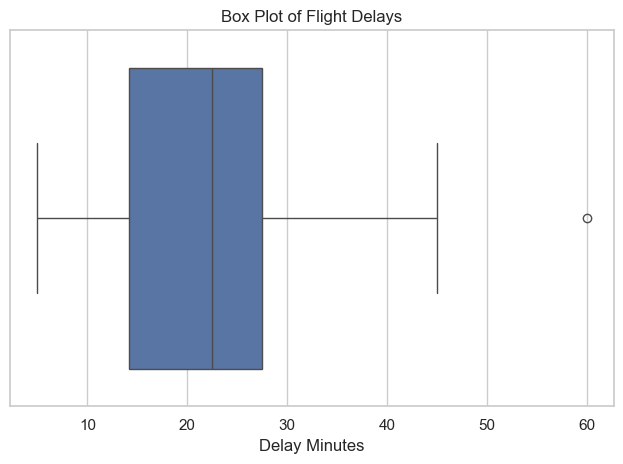

In [18]:
# Box Plot

sns.boxplot(x=df['DelayMinutes'])
plt.title('Box Plot of Flight Delays')
plt.xlabel('Delay Minutes')

plt.tight_layout()
plt.show()


# Interpretation
Most flights in the dataset have delays between 10 and 30 minutes, which could be considered a relatively moderate range of delays within the range from 15 to 30 minutes
The flight with a delay of 60 minutes is an extreme case. While it might not be a data error, such delays are uncommon and may require special handling in your analysis.
The box plot shows a slight right skew. This suggests that while most delays are relatively short, there are a few flights with longer-than-usual delays pulling the average higher.

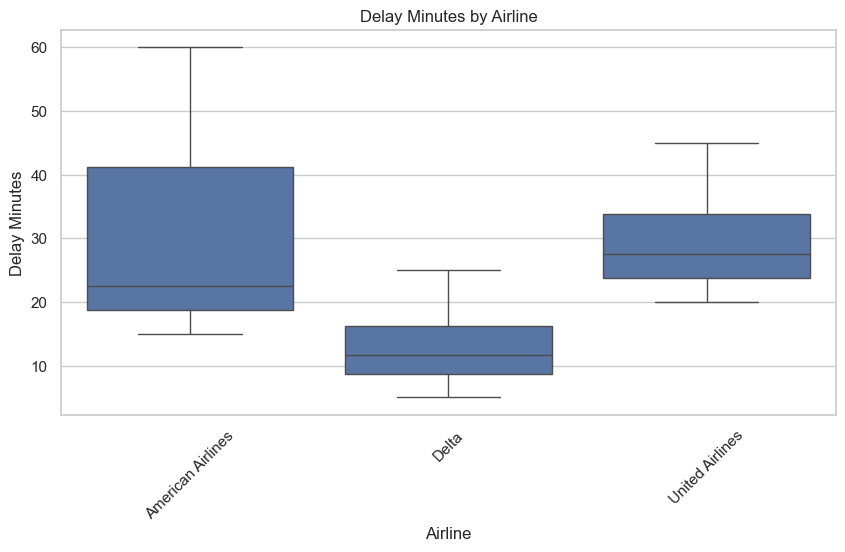

In [19]:

# Check for trends based on Airline
plt.figure(figsize=(10, 5))
sns.boxplot(x='Airline', y='DelayMinutes', data=df)
plt.title('Delay Minutes by Airline')
plt.xlabel('Airline')
plt.ylabel('Delay Minutes')
plt.xticks(rotation=45)
plt.show()

# Interpretation


1. Delta Airlines experiences the least delays, with a median delay of about 10 minutes. Delta also has the most consistent performance, with a tight interquartile range (IQR) of 5 to 15 minutes and very few flights exceeding a 25-minute delay.

2. American Airlines shows more variability in delays, with a median delay of about 30 minutes. The interquartile range for American Airlines is 20 to 40 minutes, and some flights experience delays up to 60 minutes, making it the airline with the widest delay spread.

3. United Airlines has a similar median delay to American Airlines at 30 minutes, but the overall variability in delays is slightly smaller. The IQR is 20 to 40 minutes, with delays extending up to 50 minutes.

Summary:
Delta Airlines has the shortest and most consistent delays, making it the most reliable option in this comparison.
American Airlines has the largest range of delays, with some flights facing significant delays of up to 60 minutes.
United Airlines falls between the two in terms of consistency and delay time, with moderate variability but longer delays compared to Delta.

             Airline  AverageDelayMinutes
0  American Airlines            32.500000
1              Delta            13.333333
2    United Airlines            30.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_9224\2789257950.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Airline', y='AverageDelayMinutes', data=average_delay_per_airline, palette='Blues_d')


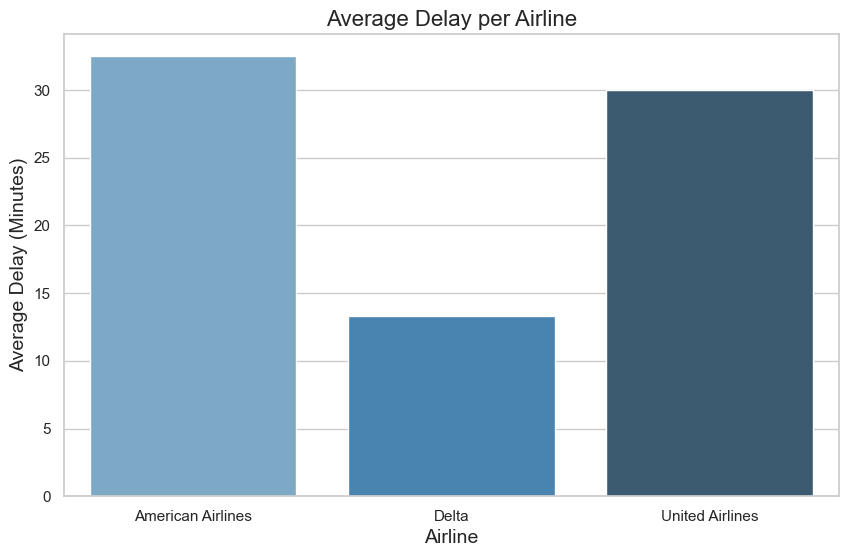

In [21]:
# Calculate the average delay for each airline
average_delay_per_airline = df.groupby('Airline')['DelayMinutes'].mean().reset_index()

# Rename the columns for clarity
average_delay_per_airline.columns = ['Airline', 'AverageDelayMinutes']

# Display the average delays
print(average_delay_per_airline)


# Sample code for plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Airline', y='AverageDelayMinutes', data=average_delay_per_airline, palette='Blues_d')

# Add labels and title
plt.title('Average Delay per Airline', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Average Delay (Minutes)', fontsize=14)

# Display the plot
plt.show()

# Relationships between flight delays and departure times

Correlation between Departure Time and Delay Minutes: 0.68


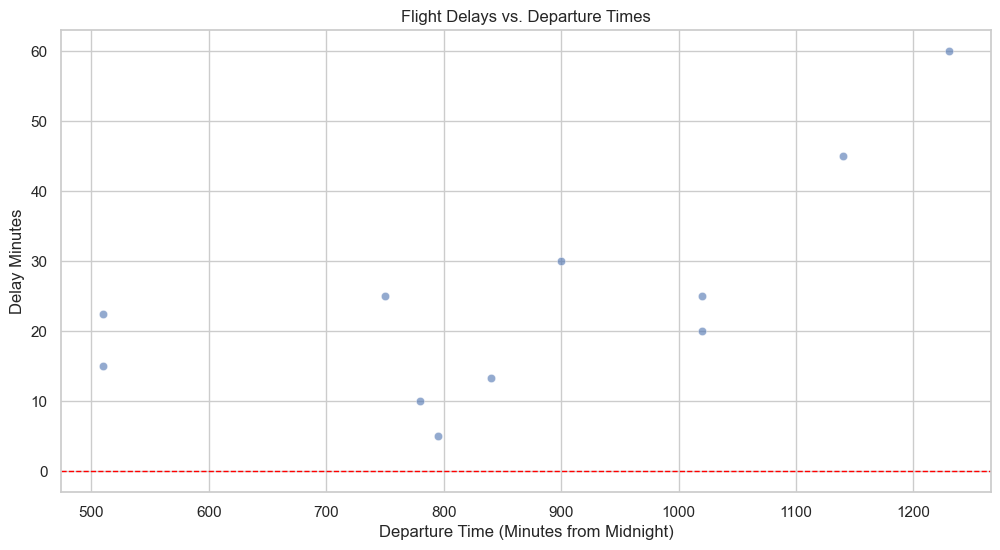

In [22]:

# Convert DepartureTime to total minutes from midnight
df['DepartureTimeMinutes'] = pd.to_datetime(df['DepartureTime'], format='%H:%M').dt.hour * 60 + pd.to_datetime(df['DepartureTime'], format='%H:%M').dt.minute
# Calculate the correlation between departure time minutes and delay minutes
correlation = df['DepartureTimeMinutes'].corr(df['DelayMinutes'])
print(f"Correlation between Departure Time and Delay Minutes: {correlation:.2f}")
plt.figure(figsize=(12, 6))
sns.scatterplot(x='DepartureTimeMinutes', y='DelayMinutes', data=df, alpha=0.6)
plt.title('Flight Delays vs. Departure Times')
plt.xlabel('Departure Time (Minutes from Midnight)')
plt.ylabel('Delay Minutes')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Reference line at 0 delay
plt.show()


# Interpretation


The correlation value of 0.68 between Departure Time and Delay Minutes suggests a moderate positive relationship.
Later departure times (further from midnight) are more likely to experience longer delays.
The scatter plot visually supports this relationship, as flights departing later in the day (with higher values of minutes from midnight) generally show a trend towards higher delay minutes.

In [23]:
import scipy.stats as stats

# Perform ANOVA
anova_results = stats.f_oneway(*[group['DelayMinutes'].values for name, group in df.groupby('Airline')])

# Display the results
print("ANOVA Results:")
print(f"F-statistic: {anova_results.statistic:.2f}")
print(f"P-value: {anova_results.pvalue:.4f}")

# Interpretation
if anova_results.pvalue < 0.05:
    print("There is a significant difference in delays between different airlines.")
else:
    print("There is no significant difference in delays between different airlines.")


ANOVA Results:
F-statistic: 1.88
P-value: 0.2145
There is no significant difference in delays between different airlines.


# Recommendations based on Analysis

1. Monitor and Improve Afternoon and Evening Flight Operations

*Insight*: The analysis shows that flights departing later in the day tend to have more significant delays.

*Recommendation*: Airlines and airport operators should allocate additional resources or improve operational efficiencies for afternoon and evening flights. This could include adjusting staffing, reducing turnaround times, and improving ground handling during peak hours.

2. Schedule High-Importance Flights Earlier in the Day

*Insight*: Flights departing earlier in the day tend to experience fewer delays.

*Recommendation*: Airlines should prioritize scheduling high-importance flights (e.g., international connections or business flights) in the morning to minimize the risk of delays and avoid compounding issues later in the day.

3. Implement Delay Mitigation Strategies in the Afternoon

*Insight*: Delays tend to accumulate as the day progresses.

*Recommendation*: Airlines and airports should consider delay mitigation strategies for afternoon and evening flights, such as buffer time between flights, better air traffic management, or enhancing efficiency in boarding and deplaning processes.

4. Targeted Customer Communication

*Insight*: Afternoon and evening delays are more common.

*Recommendation*: Proactively inform customers booked on afternoon and evening flights of potential delays. Airlines can offer options like flexible rebooking for critical travelers to earlier flights or set expectations more clearly.

5. Data-Driven Operations and Continuous Monitoring

*Insight*: The correlation between departure time and delays suggests a pattern that could be leveraged for decision-making.

*Recommendation*: Continuously monitor and analyze real-time delay data to adapt operations. Machine learning algorithms could predict delays based on time of day, allowing for proactive management.

6. Operational Efficiency Improvements

*Insight*: Delays later in the day may be caused by compounding issues such as delayed earlier flights or airport congestion.

*Recommendation*: Airlines and airports should focus on reducing the cascading effect of delays by improving operational efficiency. Optimizing flight scheduling, reducing congestion, and ensuring rapid turnaround times can help in minimizing the delays observed.


# Saving the Cleaned data

Saving the cleaned data as ``` cleaned_flights_data.csv```

In [24]:
df.to_csv('cleaned_flights_data.csv', index=False)